In [347]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
from scipy.fftpack import fft #дискретное преобразрвание Фурье 
from scipy.fftpack import ifft #обратное преобразрвание Фурье 

def f(t, fn):
    return np.cos(fn*t*2.0*np.pi)       #x(t)
# A * np.cos(t*2*np.pi/T)  


def f_with_A(t, fn):
    return A * np.cos(t*2*np.pi*fn)  

# Задание 1

In [572]:
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N=x.shape[0]
    n= np.arange(N)  # 1->N
    k = n.reshape((N,1))
    M=np.exp(-2j* np.pi* k*n/N)
    #return M
    return np.dot(M, x)


def fft_slow(x):
    x = np.asarray(x, dtype=float)
    x = x[::2]
    N=(x.shape[0])
    n= np.arange(N)  # 0->N/2-1
    
    k = n.reshape((N,1))
    
    M=np.exp(-2j* np.pi* k*n/N)  #W от k и N/2-1
    #M.reshape(1, 100)
    
    return (np.dot(2*M, x))

In [573]:
A = 2 #амплдитуда 
t0 = 0
N = 600


In [574]:
N//2

300

In [575]:
f1 = 50
f2 =150
T1 = 1/f1
T2=1/f2
T1


0.02

In [576]:
fun1 = np.cos(f1*x*2.0*np.pi)
fun2 = np.cos(f2*x*2.0*np.pi)

x = np.linspace(0,8,100)
y1 = [f_with_A(t, f1) for t in x] 
y2 = [f_with_A(t, f2) for t in x] 

x1 = np.fft.fftshift(np.fft.fftfreq(x.shape[-1], x[1]-x[0]))

y_fft1 = (fft(f_with_A(x, f1)))  #встроенная функция 
y_fft2 = (fft(f_with_A(x, f2)))


y_slow1 = f_with_A(x, f1)  #реализвция функции  
y_slow2 = f_with_A(x, f2)

y_fft_slow = (fft_slow(y_slow1))#####################

y_slow1 = ((DFT_slow(y_slow1)  ))
y_slow2 = ((DFT_slow(y_slow2)  ))



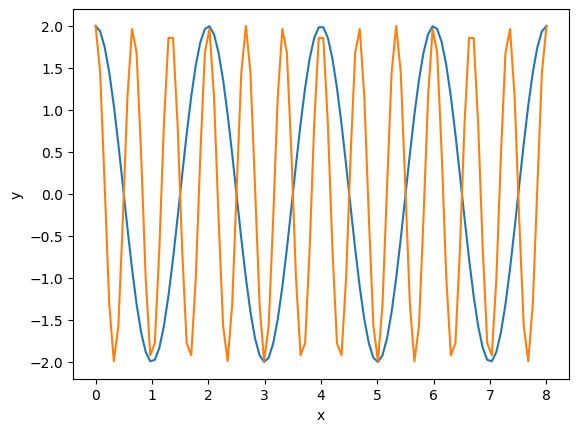

In [553]:
plt.plot(x, y1)#50
plt.plot(x, y2)#150
plt.xlabel('x')
plt.ylabel('y')
plt.show()

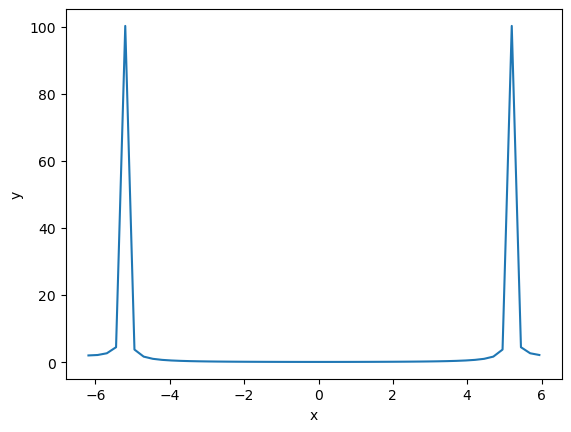

In [554]:
plt.plot(x1[::2], abs(y_fft_slow))  #50 синий
plt.xlabel('x')
plt.ylabel('y')
plt.show()

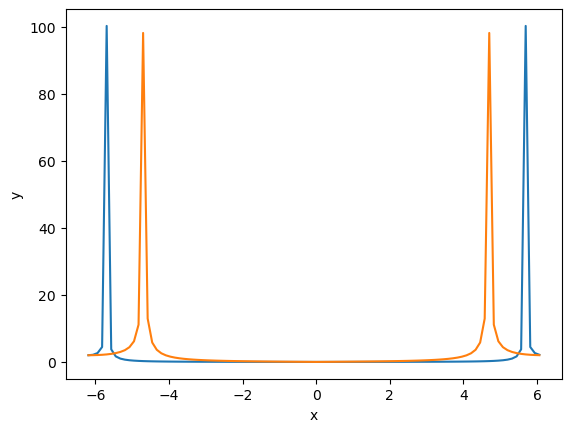

In [388]:
plt.plot(x1, abs(y_fft1))  #50 синий
plt.plot(x1, abs(y_fft2))   #150 оранж
plt.xlabel('x')
plt.ylabel('y')
plt.show()

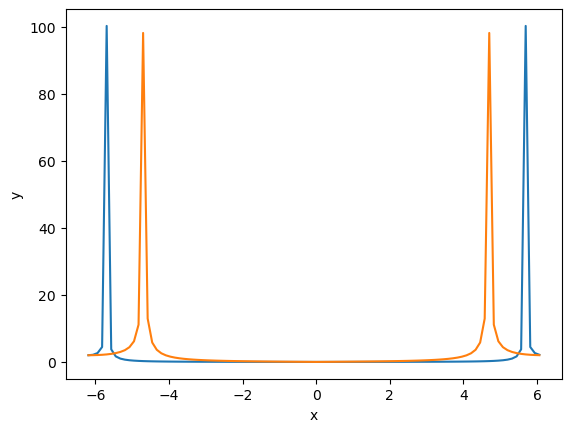

In [351]:
plt.plot(x1,abs(y_slow1))
plt.plot(x1, abs(y_slow2))
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [566]:
import time

start_time = time.time()
DFT_slow(x)
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

start_time = time.time()
fft(x)
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)



0.0026159286499023438
0.0010650157928466797
0.0010547637939453125


In [581]:
%timeit fft_slow(x)

337 µs ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [582]:
%timeit fft(x)

15.3 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [583]:
%timeit DFT_slow(x)

1.2 ms ± 80.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [579]:
start_time = time.time()
fft_slow(x)
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

0.0


In [607]:
print(time.time())
print(time.time())
print ()

1694781770.213407
1694781770.213407



# Из спектра fft

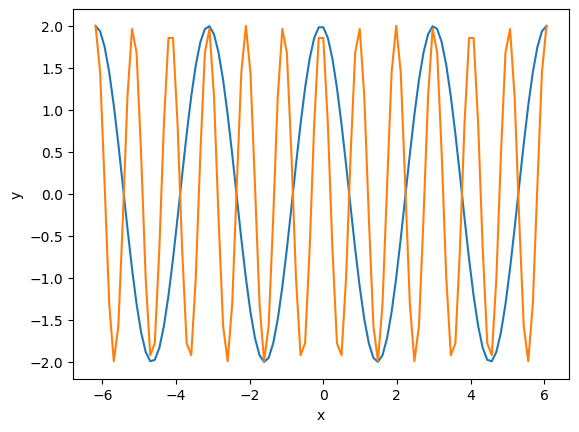

In [316]:
plt.plot(x1, ifft(y_fft1))
plt.plot(x1, ifft(y_fft2))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Из спектра DFT

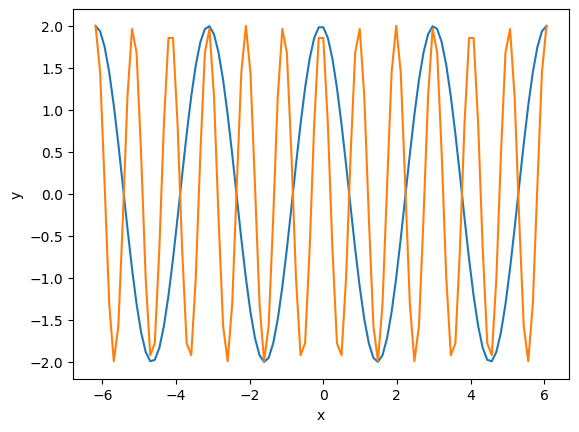

In [317]:
plt.plot(x1, ifft((y_slow1)))
plt.plot(x1, ifft((y_slow2)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Шум

In [318]:
noise = np.random.normal(0,1,x.shape) # значения белого шума

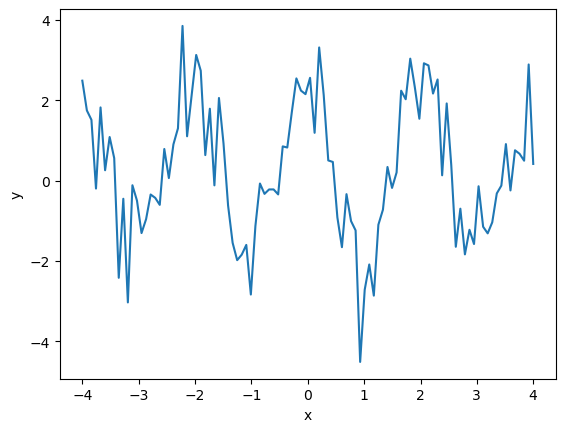

In [319]:
plt.plot(x, (y1+noise))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

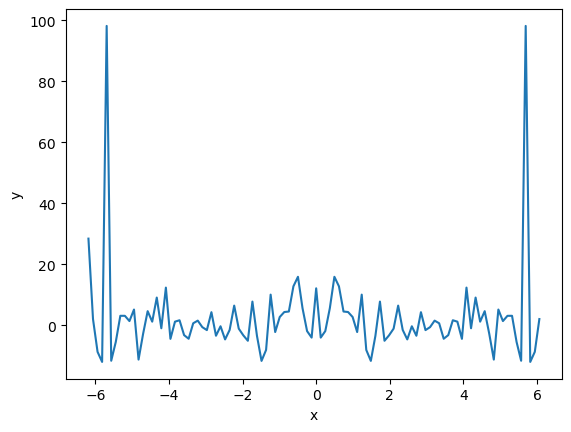

In [320]:
plt.plot(x1, (fft(y1+noise)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

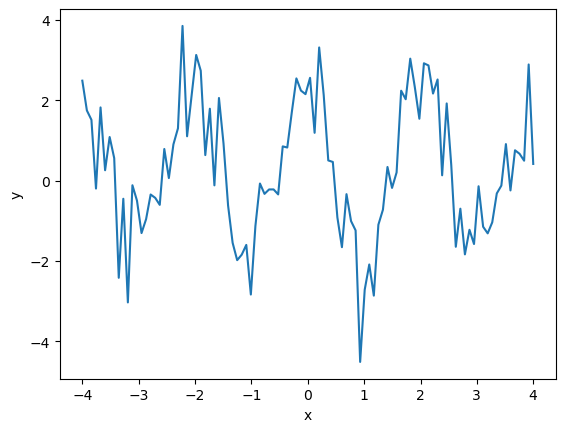

In [321]:
plt.plot(x, ifft((fft(y1+noise))))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

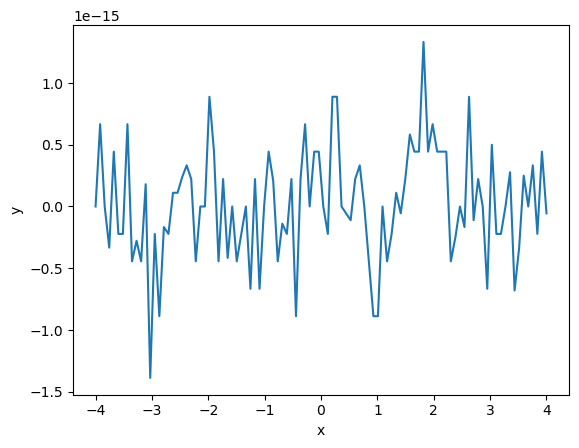

In [323]:
#ifft(fft(y1+noise)) - (y1+noise)
plt.plot(x, ifft(fft(y1+noise)) - (y1+noise))     #РАЗНИЦА РЕЗУЛЬТАТОВ 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Задание 2

In [336]:
T=2
A=2

def f_with_A(t):
    return np.sign(math.tan(np.pi*t/T))*A

x2 = np.linspace(-4,4,100)
y2 = [f_with_A(t) for t in x2] 

x22 = np.fft.fftshift(np.fft.fftfreq(x2.shape[-1], x2[1]-x2[0]))

y_fft = (fft([f_with_A(t) for t in x22]))
y_slow = DFT_slow([f_with_A(t) for t in x22])  

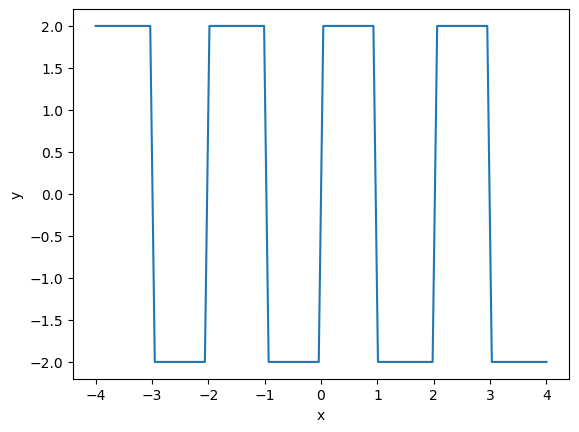

In [338]:
plt.plot(x2, y2)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

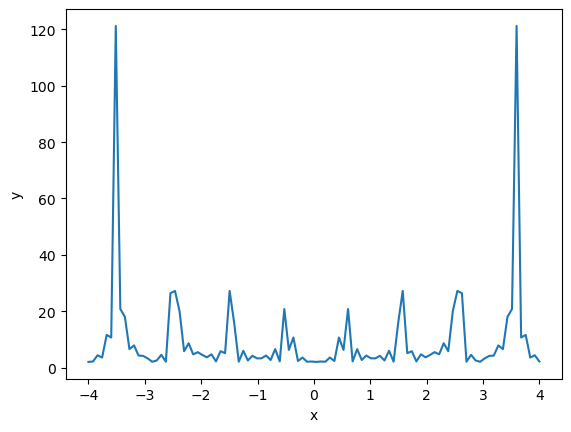

In [339]:
plt.plot(x2, abs(y_fft))   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

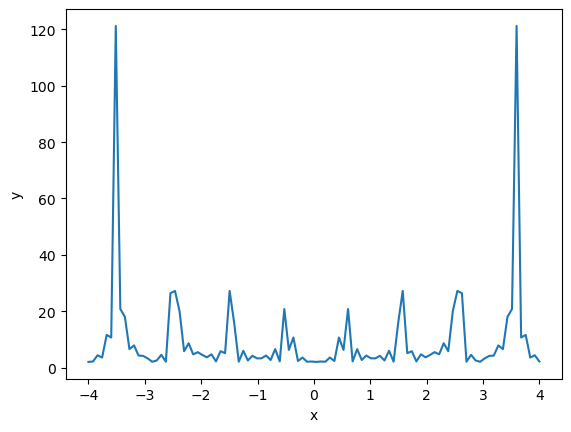

In [340]:
plt.plot(x2, abs(y_slow)) 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Тоже самое, но с шумами 

In [341]:
noise = np.random.normal(0,1,x2.shape) # значения белого шума

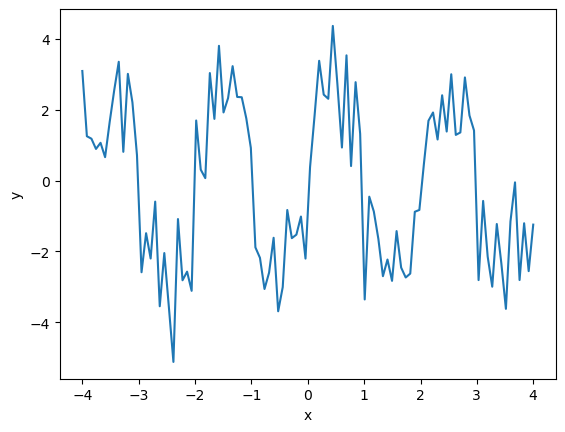

In [342]:
plt.plot(x2, (y2+noise))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

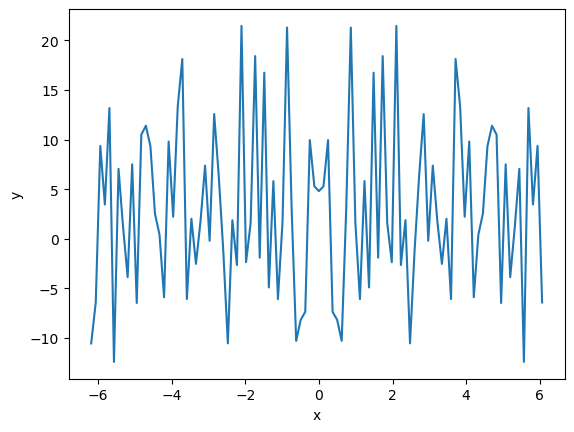

In [343]:
plt.plot(x22, fft(y2+noise))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

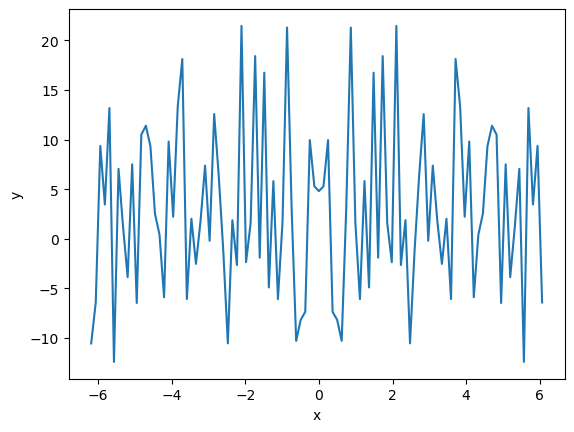

In [344]:
plt.plot(x22, DFT_slow(y2+noise))
plt.xlabel('x')
plt.ylabel('y')
plt.show()